# Description

In this notebook you'll find a way to download the data.  
Both data with jet and without are downloaded here and are stored in the previously defined folder : data1 and data0 respectively.  
The steps are the following :  
- Importing csv file that contain the date and the cutout wanted for the image
- Making the request to the JSOC server for the wanted duration (30 images)
- Getting the numpy array from the requested files
- Transforming the array to perform a MaxPool2D (convolution over the image to deacrease its size from 500x500 to 166x166)
- Storing the image into a numpy array using a compressed version  


**Somes infos :**  
`Total number of events` = 1766  
`Downloading rate` : 2mins / event --> total = 59 hours (2,5 days !!!!)  
`File data storage` = 900 Ko  
`Total storage` = 1,6 Go   

<span style="color:red">Do not run the part of "Run AIA Request" in this notebook, computation time is approximately 3 days in total</span>

# Import functions and libraries

In [8]:
import pandas as pd
import numpy as np
import os
import random
import shutil

from helper_data_creation import *

# Animations
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from astropy.visualization import ImageNormalize, SqrtStretch

# Creation of positive dataset

The first dataset that we created was based on the jet events of 2011 to 2016 classified by citizen.  
Data are extracted from here : https://conservancy.umn.edu/handle/11299/257209 and the csv form (already present in the github repository).

In [3]:
data=load_data() #Function made in function_AIA.py to extract jet events data
data.head(3) #First three jet events

#sjh_ID                        date  \
0  sjh_2011-01-20T09_1  2011-01-20T09:15:44.000000   
1  sjh_2011-01-20T23_1  2011-01-20T23:49:20.000000   
2  sjh_2011-01-20T23_2  2011-01-20T23:54:32.000000   

                        SOL_event  duration  basepoint_X     std_X  \
0  SOL2011-01-20T09:00:09L289C165      43.6  -226.577125  7.456468   
1  SOL2011-01-20T22:00:09L353C074      10.8  -143.625000  1.125000   
2  SOL2011-01-20T22:00:09L353C074       5.6  -142.500000  0.000000   

   basepoint_Y     std_Y  basepoint_X_longitude  basepoint_Y_latitude  \
0  -956.964375  9.576814                 -109.0                 -75.0   
1   386.404000  2.856000                   -8.0                  18.0   
2   389.260000  0.000000                   -8.0                  18.0   

   max_height    upper_H    lower_H  avg_width  std_width     sigma  flag  
0  173.811389  46.785032 -36.862662  52.282512  14.552284  0.417661     1  
1   97.731917  16.548028 -14.151831  83.204500  10.121327  0.337046    10  
2   75.814019  49.693522 -30.017843  40.384010   0.000000  0.635112   110

<h1>Description of the features</h1>


<p><strong>"sjh_ID”</strong>: Solar Jet Hunter ID for this jet (data and hour of event; last number denotes which event this was in that hour) <br><br>
<strong>Date</strong>: Observation time of the start of the jet (format YYYY-MM-DDThh:mm:ss) <br><br>
<strong>SOL_event</strong>: The coronal jet event name from HEK database where this jet was found in (multiple jets can be found in one coronal event) <br><br>
<strong>Duration</strong> of the jet (minutes) <br><br>
<strong>Basepoint_X</strong>: Basepoint of the jet in (Heliocentric solar X coordinates in arcsec) <br><br>
<strong>Std_X</strong>: Standard deviation of the base point if there were multiple measurements of the base point (Heliocentric solar X coordinates in arcsec) <br> <br><strong>Basepoint_Y</strong>: Basepoint of the jet in (Heliocentric solar Y coordinates in arcsec)  <br><br>
<strong>Std_Y</strong>: Standard deviation of the base point if there were multiple measurements of the base point (Heliocentric solar Y coordinates in arcsec) <br> <br><strong>basepoint_X_longitude</strong>: Basepoint of the jet (longitude) <br><br>
<strong>basepoint_Y_latitude</strong>: Basepoint of the jet (latitude) <br><br>
<strong>max_height</strong>: Maximum height jet reaches (arcsec) <br><br>
<strong>upper_H</strong>: Upper limit of the error height (arcsec) <br><br>
<strong>lower_H</strong>: Lower limit of the error height (arcsec) <br><br
<strong>avg_width</strong>: Average width of the jet box (arcsec) <br><br>
<strong>std_width</strong>: Standard deviation width (arcsec) <br><br>
<strong>velocity</strong>: Velocity estimate (arcsec per sec)sigma: Average sigma of the jet, (sigma= 1-IoU) <br><br>
<strong>flag</strong>: Binary quality flagsflag 100 means the jet cluster has a duration of less than 6 minutes, which for many corresponds to a jet cluster found in one Zooniverse subject.flag 010 means the velocity estimate could not be calculated because the maximum was reached in the first subject the jet was found in.flag 001 means the basepoint has a Longitude of higher than 90 degrees meaning the base point was found to be (slightly) off limb. <br> </p>


Usefull columns are : date, basepoint_X, basepoint_Y.  
The csv will be used after for requesting data

<h1>Description of the features</h1>


<p><strong>"sjh_ID”</strong>: Solar Jet Hunter ID for this jet (data and hour of event; last number denotes which event this was in that hour) <br><br>
<strong>Date</strong>: Observation time of the start of the jet (format YYYY-MM-DDThh:mm:ss) <br><br>
<strong>SOL_event</strong>: The coronal jet event name from HEK database where this jet was found in (multiple jets can be found in one coronal event) <br><br>
<strong>Duration</strong> of the jet (minutes) <br><br>
<strong>Basepoint_X</strong>: Basepoint of the jet in (Heliocentric solar X coordinates in arcsec) <br><br>
<strong>Std_X</strong>: Standard deviation of the base point if there were multiple measurements of the base point (Heliocentric solar X coordinates in arcsec) <br> <br><strong>Basepoint_Y</strong>: Basepoint of the jet in (Heliocentric solar Y coordinates in arcsec)  <br><br>
<strong>Std_Y</strong>: Standard deviation of the base point if there were multiple measurements of the base point (Heliocentric solar Y coordinates in arcsec) <br> <br><strong>basepoint_X_longitude</strong>: Basepoint of the jet (longitude) <br><br>
<strong>basepoint_Y_latitude</strong>: Basepoint of the jet (latitude) <br><br>
<strong>max_height</strong>: Maximum height jet reaches (arcsec) <br><br>
<strong>upper_H</strong>: Upper limit of the error height (arcsec) <br><br>
<strong>lower_H</strong>: Lower limit of the error height (arcsec) <br><br
<strong>avg_width</strong>: Average width of the jet box (arcsec) <br><br>
<strong>std_width</strong>: Standard deviation width (arcsec) <br><br>
<strong>velocity</strong>: Velocity estimate (arcsec per sec)sigma: Average sigma of the jet, (sigma= 1-IoU) <br><br>
<strong>flag</strong>: Binary quality flagsflag 100 means the jet cluster has a duration of less than 6 minutes, which for many corresponds to a jet cluster found in one Zooniverse subject.flag 010 means the velocity estimate could not be calculated because the maximum was reached in the first subject the jet was found in.flag 001 means the basepoint has a Longitude of higher than 90 degrees meaning the base point was found to be (slightly) off limb. <br> </p>


# Creation of the negative dataset

We have to define a balanced dataset and then, define non jet events. To do so, we create our own dataset with events from the HEK database where citizen classified them as non jet.

In [4]:
#Request to the HEK database
result = Fido.search(a.Time('2011-01-20T00:00', '2016-12-24T00:00'),
                     a.hek.EventType("CJ"),)
                     
hek_results = result["hek"]
print(hek_results.colnames)

['gs_thumburl', 'comment_count', 'hpc_bbox', 'outflow_width', 'frm_humanflag', 'hgc_coord', 'event_coordsys', 'obs_levelnum', 'hpc_coord', 'event_npixels', 'gs_imageurl', 'ar_polarity', 'frm_paramset', 'hrc_coord', 'event_starttime', 'ar_mtwilsoncls', 'event_type', 'intensmin', 'obs_meanwavel', 'outflow_openingangle', 'frm_url', 'skel_chaincode', 'bound_chaincode', 'noposition', 'active', 'intensmax', 'frm_versionnumber', 'area_uncert', 'obs_dataprepurl', 'hpc_geom', 'hgc_bbox', 'intensmedian', 'chaincodetype', 'obs_channelid', 'event_clippedspatial', 'ar_noaaclass', 'SOL_standard', 'event_avg_rating', 'eventtype', 'intensunit', 'hpc_boundcc', 'event_mapurl', 'frm_contact', 'ar_penumbracls', 'intensmean', 'bound_ccstartc1', 'outflow_transspeed', 'frm_name', 'area_atdiskcenter', 'frm_identifier', 'obs_observatory', 'event_description', 'boundbox_c2ur', 'obs_firstprocessingdate', 'boundbox_c2ll', 'frm_institute', 'hrc_bbox', 'refs_orig', 'ar_mcintoshcls', 'event_maskurl', 'bound_ccstartc

In [6]:
filtered_results = hek_results['SOL_standard','event_coord1', 'event_coord2','hpc_bbox','event_starttime','event_endtime'] 
results_df = filtered_results.to_pandas()


df = results_df.drop_duplicates()

"""
 Split each event into chunks of 12 minutes (24s * 30) as we are working with sequence of 30 images

 """

df['event_starttime'] = pd.to_datetime(df['event_starttime'])
df['event_endtime'] = pd.to_datetime(df['event_endtime'])

split_interval = pd.to_timedelta('12 minutes')

# Create a new DataFrame to store the split events
column_names = ['SOL_standard', 'event_coord1', 'event_coord2', 'event_starttime', 'event_endtime' ]
SOL_events = pd.DataFrame(columns=column_names)

# Iterate over the original DataFrame
for index, row in df.iterrows():
    event_start = row['event_starttime']
    event_end = row['event_endtime']
    # Generate a range of timestamps within the original event's time interval
    intervals = pd.date_range(start=event_start, end=event_end, freq=split_interval)
    
    time_stamps = intervals[0]
    for i in range((intervals.shape)[0]-1):
        SOL_events.loc[len(SOL_events.index)] = [row['SOL_standard'], 
                        row['event_coord1'], 
                        row['event_coord2'], 
                        intervals[i],
                        intervals[i+1]]


# Display the DataFrame with split events
print(SOL_events.shape)
SOL_events.head(3)

C:\Users\Adrien\AppData\Local\Temp\ipykernel_18632\2688261914.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_starttime'] = pd.to_datetime(df['event_starttime'])
C:\Users\Adrien\AppData\Local\Temp\ipykernel_18632\2688261914.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_endtime'] = pd.to_datetime(df['event_endtime'])


(4713, 5)


SOL_standard  event_coord1  event_coord2  \
0  SOL2011-01-20T09:00:09L289C165        -245.0       -1003.0   
1  SOL2011-01-20T09:00:09L289C165        -245.0       -1003.0   
2  SOL2011-01-20T09:00:09L289C165        -245.0       -1003.0   

      event_starttime       event_endtime  
0 2011-01-20 09:00:09 2011-01-20 09:12:09  
1 2011-01-20 09:12:09 2011-01-20 09:24:09  
2 2011-01-20 09:24:09 2011-01-20 09:36:09

In [7]:
""" 
Compare each time chunk of split_df (HEK CJ events) and the original csv

"""

# Add a new column to our .csv containing the endtime of each event
csv_df = data.copy()
csv_df['date'] = pd.to_datetime(csv_df['date'])

# Calculate the end time and add a new column 'End_Time'
csv_df['end_time'] = csv_df['date'] + pd.to_timedelta(csv_df['duration'], unit='m')
csv_df

""" 
- for each SOL_event, compare time intervals from split_df and csv_df
=> convert starttime and endtime of csv_df to intervals using pd.interval('starttime', 'endtime')
=> check for overlap by comparing each start_time and end_time from split_df with the jet interval (use interval.right and interval.left)
- use boolean indexing to index the intervals in split_df that do not overlap
- use those the fetch images
"""

boolean_df = pd.DataFrame(columns=['overlap'])

def intervals_overlap(start1, end1, start2, end2): 

    if (start2 <= start1) & (start1 <= end2): # overlap on the right side of event 1
        ans = True
    elif (start2 <= end1) & (end1 <= end2): # overlap on left side of event 1
        ans = True
    elif (start1 <= start2) & (start2 <= end1): # event 2 contained in event 1
        ans = True
    else:
        ans = False

    return ans

for SOL_index, SOL_row in SOL_events.iterrows():
    SOL_id = SOL_row['SOL_standard'] 
    overlap = False  

    for csv_index, csv_row in csv_df.iterrows():
        csv_id = csv_row['SOL_event']

        if SOL_id == csv_id:
            """ compare time intervals """
            overlap = intervals_overlap(SOL_row['event_starttime'], SOL_row['event_endtime'], csv_row['date'], csv_row['end_time'])
        else:
            continue

    boolean_df.loc[len(boolean_df.index)] = overlap # True if the time intervals overlap

boolean_df

overlap
0       False
1        True
2        True
3        True
4       False
...       ...
4708    False
4709    False
4710    False
4711     True
4712     True

[4713 rows x 1 columns]

We don't want any overlap so we take 884 events that are not overlapping

In [10]:
#All together
final_df=SOL_events.copy()
final_df["overlap"]=boolean_df
final_df=final_df[final_df["overlap"]==False].reset_index()
final_df=final_df.drop(columns="index").rename(columns={"event_coord1": "basepoint_X", "event_coord2" : "basepoint_Y", "event_starttime": "date"})
final_df=final_df.sample(frac=1, random_state=42)
final_df=final_df[0:883]
final_df['date'] = pd.to_datetime(final_df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S.%f') #convert into same datetime format
columns_to_export=["date", "basepoint_X", "basepoint_Y"]
final_df.to_csv("./data/No_jet_df.csv", columns=columns_to_export, index=False) #Store it into a csv file to be sure that we don't change anything when requesting data
final_df.head(5)

SOL_standard  basepoint_X  basepoint_Y  \
1024  SOL2012-04-02T00:30:04L075C088  1014.000000         43.0   
2179  SOL2015-01-29T05:00:03L129C082  1045.000000        158.0   
4104  SOL2016-10-18T21:04:45L044C086   392.700012         -2.8   
3622  SOL2016-05-23T12:30:06L233C098   727.000000       -117.0   
4130  SOL2016-10-19T06:39:26L047C086   515.700012          0.2   

                            date       event_endtime  overlap  
1024  2012-04-02T14:42:04.000000 2012-04-02 14:54:04    False  
2179  2015-01-29T12:12:03.000000 2015-01-29 12:24:03    False  
4104  2016-10-18T23:04:45.000000 2016-10-18 23:16:45    False  
3622  2016-05-24T04:54:06.000000 2016-05-24 05:06:06    False  
4130  2016-10-19T10:15:26.000000 2016-10-19 10:27:26    False

Now we also have our negative dataset !

# Run AIA requests
<span style="color:red">Do not run ! go below to "Access data"</span>

## First the data with jet (data1)

In [11]:
data1=load_data()

In [12]:
num_images=30
jsoc_email="adrien.joliat@epfl.ch" #verified email adress

events_list = data1.iloc[:] #Define which event are requested (all have been done)


for i in events_list.index:

    files = get_images(data1.iloc[i], num_images, jsoc_email) # selects data line i
    # "files" is (class <parfive>) and contains N <HDUList> objects (where N is the nb of images in the sequence) 
    # that we open as "f". The attribute f.data returns a numpy array in our case, bc the data is an image.
    # sequence_array is a 3D array of shape (166, 166, N) which contains all the pixel values for one line of data (~ 1 event)

    #torch array of the whole sequency event, here we use maxpooling in the function
    sequence_array = array_file(files) 

    #Save the array
    np.savez_compressed("./data1/"+str(i)+".npz" , sequence_array)
    

    #Remove images
    for j in range(len(files)):
        os.remove(files[j])

    clear_output(wait=False)
    
    
    # Check the size of final array
    print(f"Download = {i}/{events_list.index.max()} and array ={sequence_array.shape}")
   

Download = 0/0 and array =(166, 166, 30)


## Secondly, data without jet (data0)

In [2]:
data0=load_data_nojet()
num_images=30
jsoc_email="adrien.joliat@epfl.ch" #verified email adress

events_list = data0.iloc[:]

for i in events_list.index:

    files = get_images(data0.iloc[i], num_images, jsoc_email) # selects data line i
    # "files" is (class <parfive>) and contains N <HDUList> objects (where N is the nb of images in the sequence) 
    # that we open as "f". The attribute f.data returns a numpy array in our case, bc the data is an image.
    # sequence_array is a array of shape (166, 166, N) which contains all the pixel values for one line of data (~ 1 event)
    
    #torch array of the whole sequency event, here we use maxpooling in the function
    sequence_array = array_file(files) #torch array of the whole sequency event

    #Save the array
    np.savez_compressed("./data0/"+str(i)+".npz" , sequence_array)

    #Remove images
    for j in range(len(files)):
        os.remove(files[j])
    
    # Check the size of final array
    print(f"Download = {i}/{len(events_list.index)} and array ={sequence_array.shape}")

Export request pending. [id=JSOC_20231219_2382, status=2]
Waiting for 0 seconds...
30 URLs found for download. Full request totalling 5MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-07-08T160002Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160026Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160050Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160114Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160138Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160202Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160226Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160250Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160314Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160338Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160402Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160426Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160450Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160514Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160538Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160602Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160626Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160650Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160714Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160738Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160802Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160826Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160850Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160914Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T160938Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T161002Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T161026Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T161050Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T161114Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-07-08T161138Z.304.image.fits:   0%|          | 0.00/190k [00:00<?, ?B/s]

Download = 0/1 and array =(166, 166, 30)


# Access data 

In [3]:
archive= np.load("./data1/29.npz")
array=archive["arr_0"]

We show an exemple of sequence of images, if this doesn't work, an exemple is shown as "animation.gif" in the repository

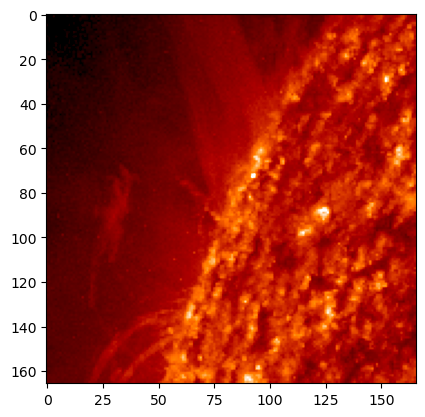

In [4]:
# Create a figure and axis
fig = plt.figure()

# Initialize the animation with an empty frame
#im = plt.imshow(np.zeros((166, 166)), cmap='gray', norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))
vmin, vmax = np.percentile(array, [1, 99.9])
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())
im = plt.imshow(np.zeros(array.shape[:2]), cmap='sdoaia304', norm=norm)

# Function to update the animation frame
def update(frame):
    im.set_data(array[:, :, frame])
    return im,

# Create the animation
ani = FuncAnimation(fig, update, frames=30, interval=100)  # 100 milliseconds per frame

# Display the animation as a clickable animation in the notebook
HTML(ani.to_jshtml())


Creation of a gif

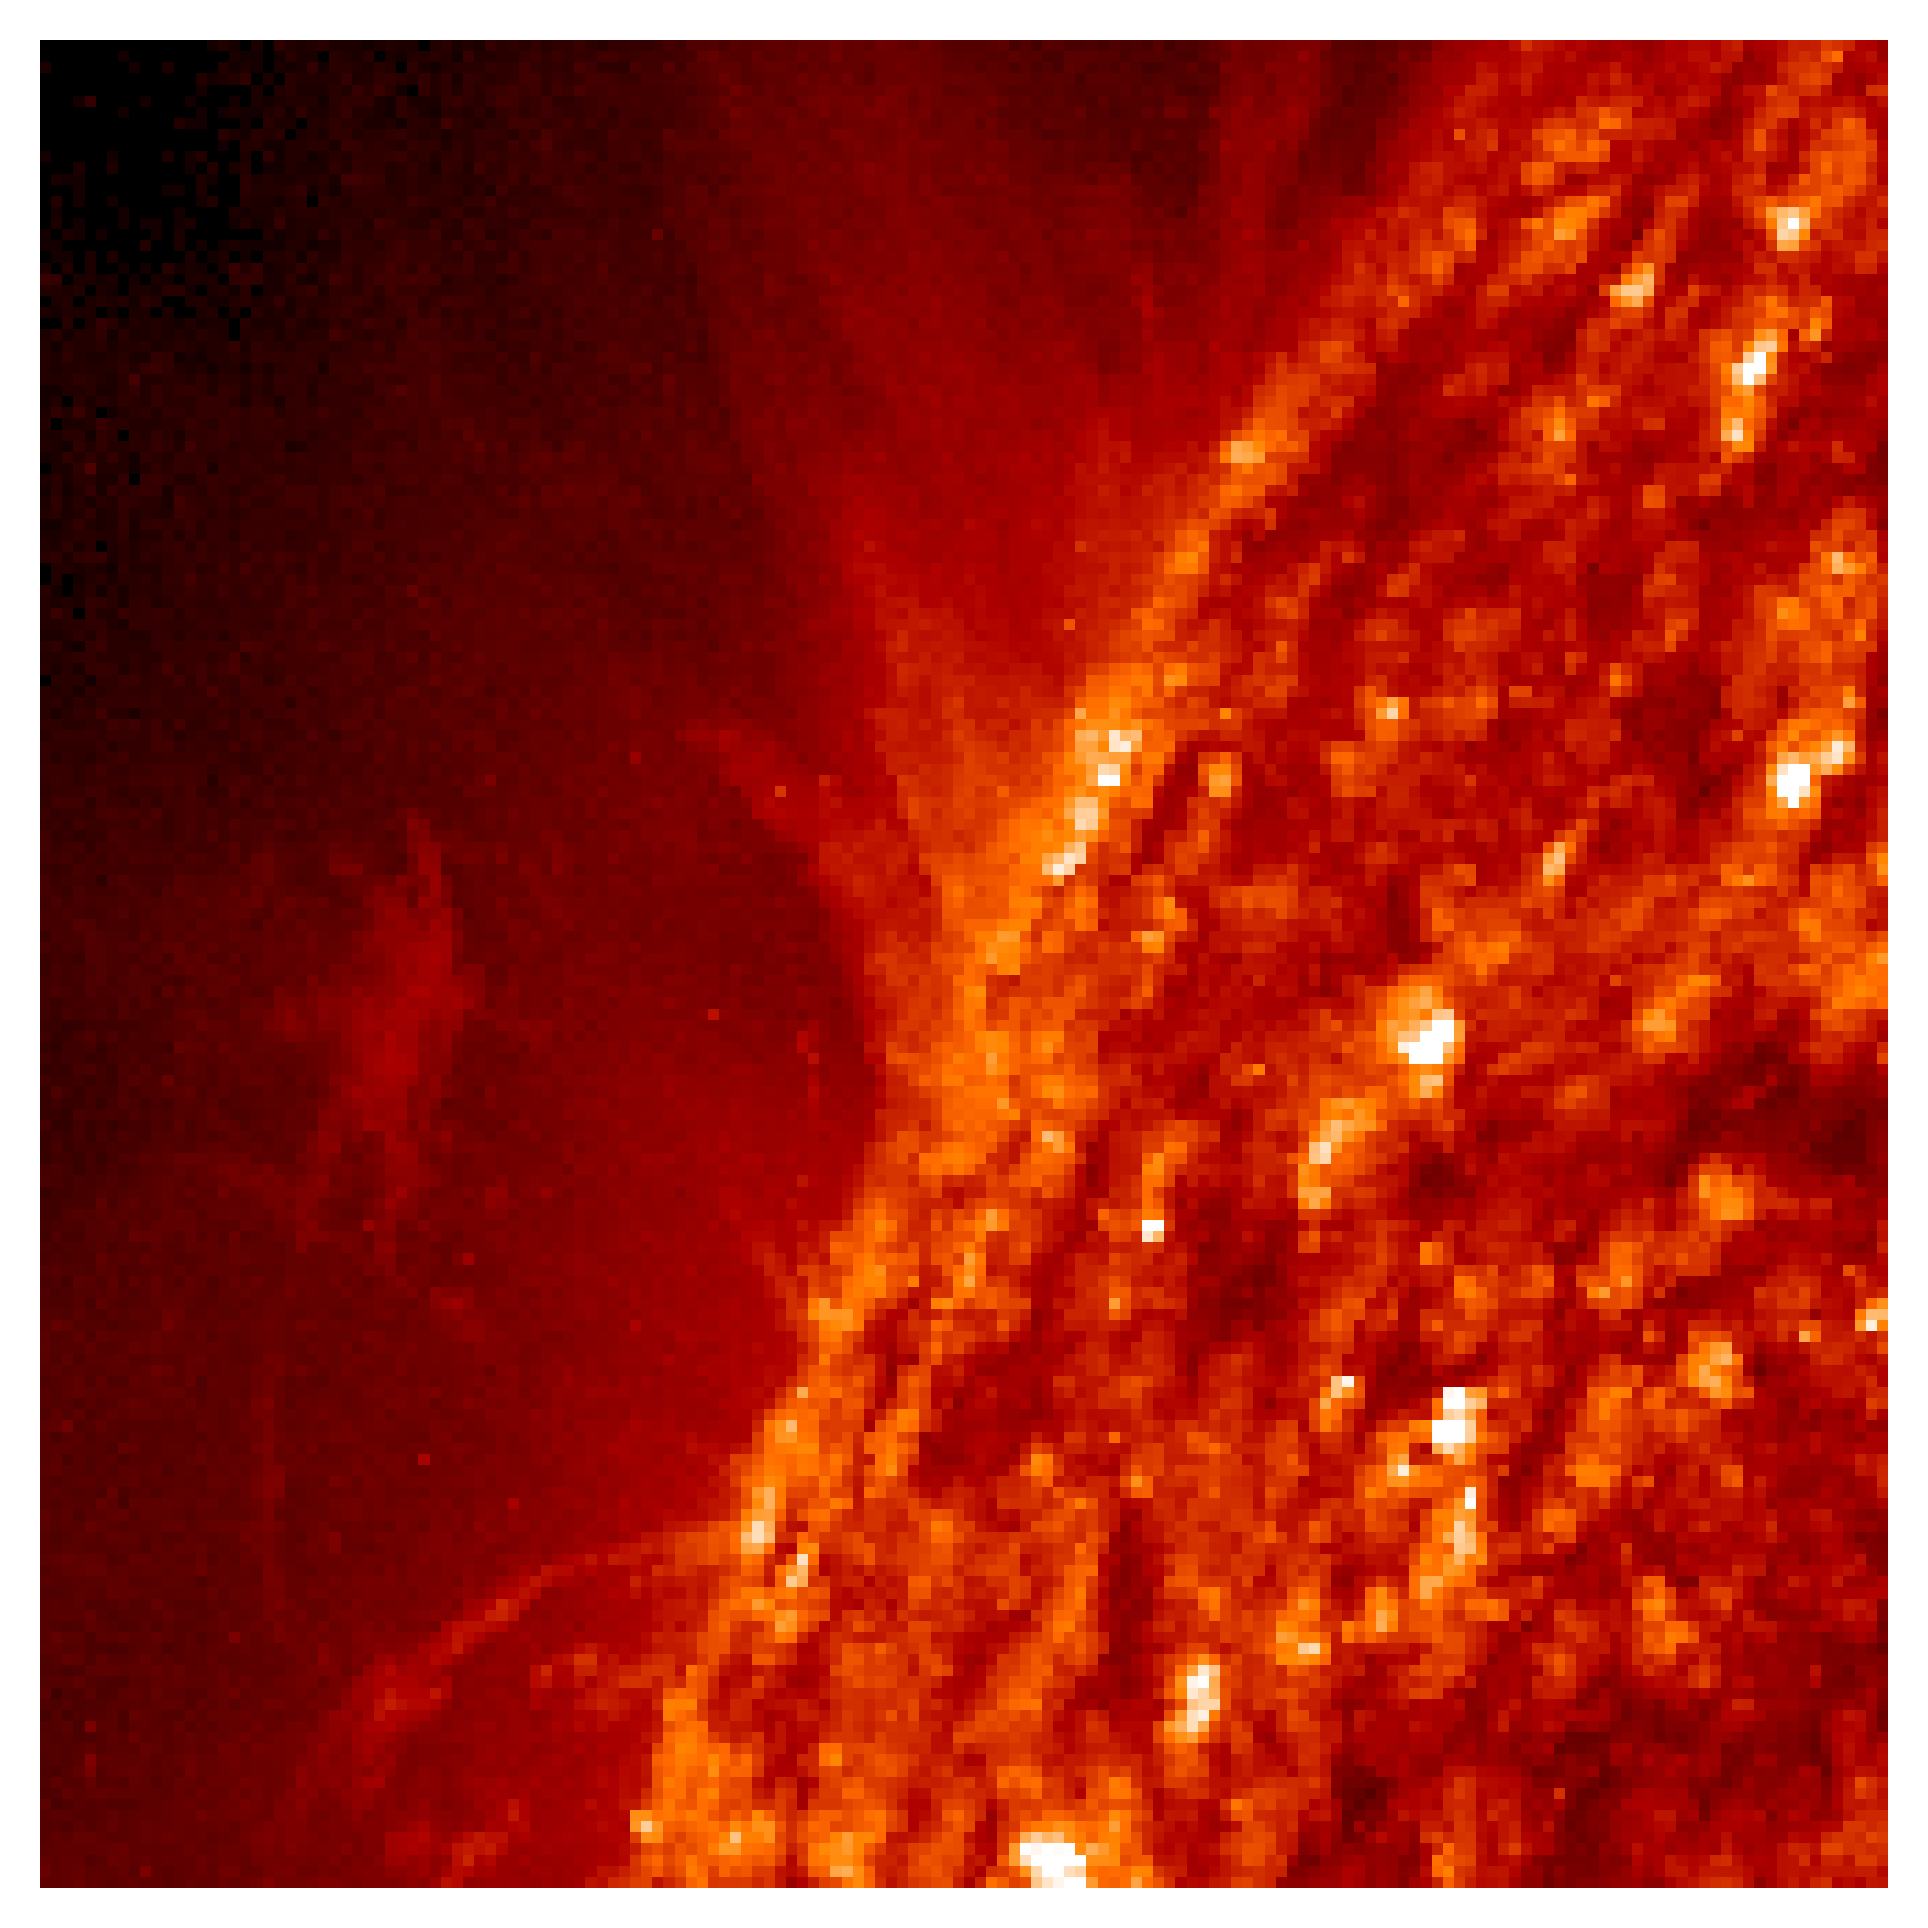

In [9]:
# Assume 'array' is your 3D NumPy array
# Adjust vmin and vmax based on your data
vmin, vmax = np.percentile(array, [1, 99.9])
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())

# Create a figure with higher DPI and larger size without axes
fig, ax = plt.subplots(dpi=400, figsize=(8, 6))
ax.axis('off')  # Turn off the axes

# Initialize the animation with an empty frame
im = ax.imshow(array[:, :, 0], cmap='sdoaia304', norm=norm)

# Function to update the animation frame
def update(frame):
    im.set_array(array[:, :, frame])
    return im,

# Create the animation with higher fps
ani = FuncAnimation(fig, update, frames=array.shape[2], interval=100, blit=True)

# Save the animation as a high-quality GIF without axes
ani.save('animation.gif', writer='pillow', fps=10, dpi=400, savefig_kwargs={'bbox_inches': 'tight', 'pad_inches': 0})

# Verify Images Shapes

Some events haven't the right expected shape (miss of images), those events will be removed before training the model

In [15]:
a=0
for i in range(882):
    if i in [480]: #Event 480 cannot be downloaded
        continue
    archive= np.load(f"./data0/{i}.npz")
    array=archive["arr_0"]
    #print(array.shape)
    if array.shape!=(166,166,30):
        a+=1
        print(f"The event {i} has not a conform shape : {array.shape}")
print(a)

The event 48 has not a conform shape : (166, 166, 18)
The event 60 has not a conform shape : (166, 166, 27)
The event 78 has not a conform shape : (166, 166, 27)
The event 89 has not a conform shape : (166, 166, 0)
The event 90 has not a conform shape : (166, 166, 29)
The event 92 has not a conform shape : (166, 166, 28)
The event 94 has not a conform shape : (166, 166, 28)
The event 99 has not a conform shape : (166, 166, 29)
The event 116 has not a conform shape : (166, 166, 6)
The event 141 has not a conform shape : (166, 166, 6)
The event 215 has not a conform shape : (166, 166, 6)
The event 219 has not a conform shape : (166, 166, 29)
The event 233 has not a conform shape : (166, 166, 6)
The event 275 has not a conform shape : (166, 166, 29)
The event 289 has not a conform shape : (166, 166, 28)
The event 302 has not a conform shape : (166, 166, 6)
The event 315 has not a conform shape : (166, 166, 29)
The event 317 has not a conform shape : (166, 166, 0)
The event 321 has not a c

# Creating folder as train/validation/test sets

Train set = 70 %  
Valid set = 15 %  
Test set = 15 %

<span style="color:red">Do not run ! Just to show how we created the folders</span>

In [ ]:
def move_random_files(source_folder, destination_folder, percentage):
    # Get a list of all files in the source folder
    all_files = os.listdir(source_folder)
    
    # Calculate the number of files to move (20% of total files)
    num_files_to_move = int(len(all_files) * percentage)

    # Randomly select the files to move
    files_to_move = random.sample(all_files, num_files_to_move)

    # Move the selected files to the destination folder
    for file_name in files_to_move:
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)
        shutil.move(source_path, destination_path)
        print(f"Moved {file_name} to {destination_folder}")

# Specify the source and destination folders
source_1 = "./data1"
destination_1 = "./data1_test"
destination_1_val = "./data1_val"

source_0 = "./data0"
destination_0 = "./data0_test"
destination_0_val = "./data0_val"

# Specify the percentage of files to move (15%)
percentage_to_move = 0.15

# Call the function to move random files
move_random_files(source_1, destination_1, 0.15)
move_random_files(source_1, destination_1_val, 0.175)

move_random_files(source_0, destination_0, 0.15)
move_random_files(source_0, destination_0_val, 0.175)


# moving back to original folder
"""
move_random_files(destination_1, source_1, 1)
move_random_files(destination_0, source_0, 1)
move_random_files(destination_1_val, source_1, 1)
move_random_files(destination_0_val, source_0, 1)
"""

# Final check
files_test1 = os.listdir("./data1_test")
files_val1 = os.listdir("./data1_val")
files_1 = os.listdir("./data1")

files_test0 = os.listdir("./data0_test")
files_val0 = os.listdir("./data0_val")
files_0 = os.listdir("./data0")

print(" # of files in data1_test", len(files_test1))
print(" # of files in data1_val", len(files_val1))
print(" # of files in data1", len(files_1))

print(" # of files in data0_test", len(files_test0))
print(" # of files in data0_val", len(files_val0))
print(" # of files in data0", len(files_0))
